In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random as rd

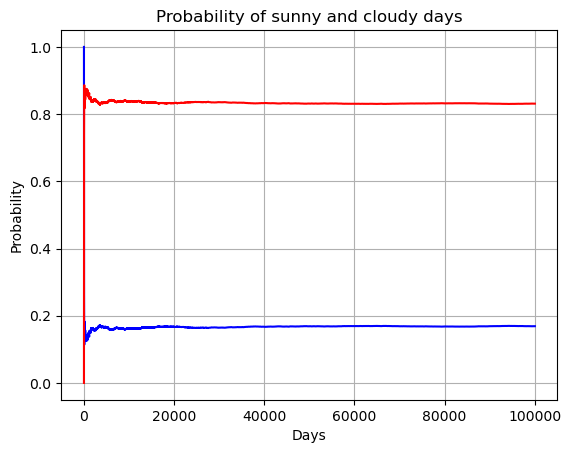

In [17]:
#SUNNY = 0, CLOUDY = 1
p_sc = 0.1
p_ss = 0.9
p_cs = 0.5
p_cc = 0.5
start = 1
days = np.array(())
c_days = np.array(())
s_days = np.array(())
days = np.append(days, start)
N_burn = 2*(10**4)
N = (10**5)
def next_day (today):
    temp = rd.uniform(0,1)
    if (today == 0): 
        if temp<=p_sc:
            return 1
        else:
            return 0
    if (today == 1):
        if temp<=p_cs:
            return 0
        else:
            return 1
    
c_days = np.append(c_days, np.count_nonzero(days))
s_days = np.append(s_days, 1-np.count_nonzero(days))   
        

for i in range (1,N):
    days = np.append(days, next_day(days[i-1]))
    c_days = np.append(c_days, np.count_nonzero(days)/(i+1))
    s_days = np.append(s_days, 1-np.count_nonzero(days)/(i+1))

fig1, ax1 = plt.subplots()
ax1.plot(np.arange(N)+1, c_days, color = 'blue')
ax1.plot(np.arange(N)+ 1, s_days, color = 'red')
ax1.set_xlabel('Days')
ax1.set_ylabel('Probability')
ax1.set_title('Probability of sunny and cloudy days')
ax1.grid()


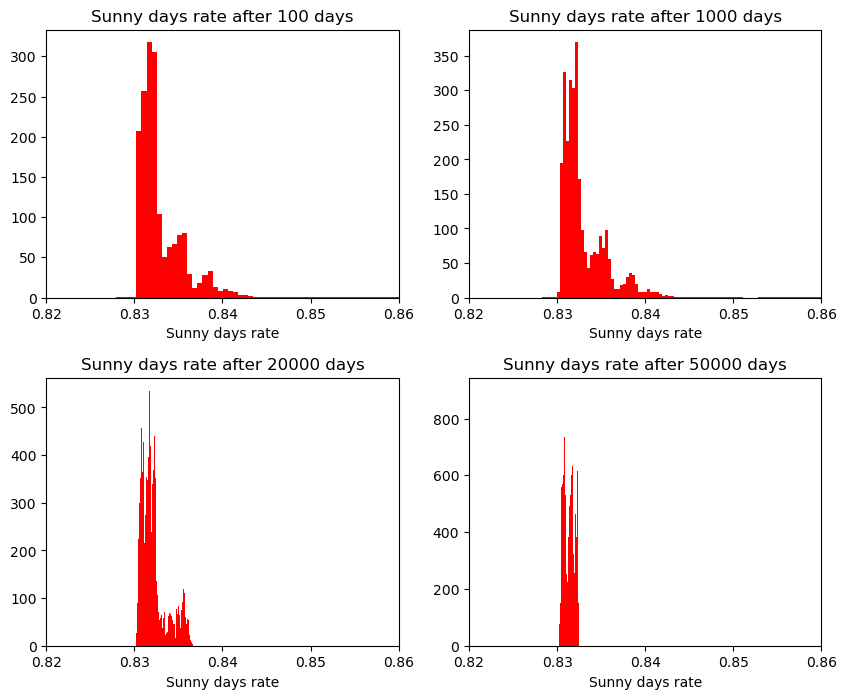

In [20]:
fig2, ax2 = plt.subplots(2,2, figsize=(10, 8))
Nburnrange = [100, 10**3, 2*10**4, 5*10**4]
for i, nburn in enumerate(Nburnrange):
    ax2[i//2, i%2].hist(s_days[nburn:], density = True, color = 'red', bins = 100)
    ax2[i//2, i%2].set_title(f'Sunny days rate after {nburn} days')
    ax2[i//2, i%2].set_xlabel('Sunny days rate')
    ax2[i//2, i%2].set_xlim(0.82,0.86)
#ax2.hist(c_days[N_burn:], density = True)
fig2.subplots_adjust(hspace = 0.3)
plt.show()

In [28]:
print('Mean value and mean standard deviation of post_sunny for different number of burn-in days:')
for N_burn in Nburnrange:
    mean_sunny = np.sum(s_days[N_burn:])/(N-N_burn)
    sunny_var =np.sum(np.square(s_days[N_burn:]-mean_sunny))/(N-N_burn-1)
    print(f'for burn-in = {N_burn} days -> {mean_sunny:.6f}   {(sunny_var**0.5)/(N**0.5):.6f}')

print('\nMedian value and median absolute deviation of post_sunny for different number of burn-in days:')
for N_burn in Nburnrange:
    med_sunny = np.median(s_days[N_burn:])
    sunny_mad = np.median(np.abs(s_days[N_burn:]-med_sunny))
    print(f'for burn-in = {N_burn} days -> {med_sunny:.6f}   {(sunny_mad**0.5)/(N**0.5):.6f}')


Mean value and mean standard deviation of post_sunny for different number of burn-in days:
for burn-in = 100 days -> 0.833263   0.000013
for burn-in = 1000 days -> 0.833009   0.000009
for burn-in = 20000 days -> 0.832173   0.000005
for burn-in = 50000 days -> 0.831349   0.000002

Median value and median absolute deviation of post_sunny for different number of burn-in days:
for burn-in = 100 days -> 0.832123   0.000105
for burn-in = 1000 days -> 0.832112   0.000104
for burn-in = 20000 days -> 0.831767   0.000084
for burn-in = 50000 days -> 0.831352   0.000071


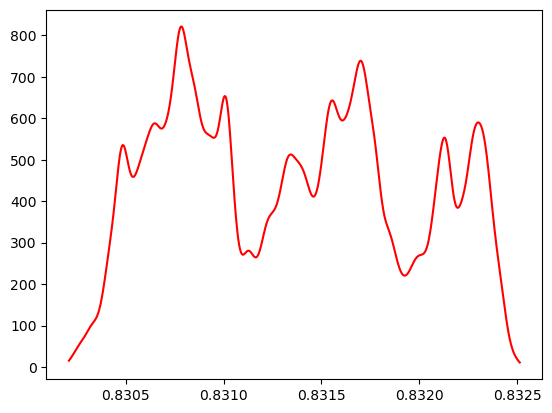

In [32]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(s_days[5*10**4:].min(),s_days[5*10**4:].max(),1000)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

PDFtophat = kde_sklearn(s_days[5*10**4:],bandwidth=sunny_mad/20,kernel="gaussian") 
plt.plot(xgrid,PDFtophat, color='red')
